In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Manohar_Projects/Diabetes Prediction/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df[["Pregnancies","Glucose","BloodPressure",'SkinThickness',"Insulin",'BMI']]=df[["Pregnancies","Glucose","BloodPressure",'SkinThickness',"Insulin",'BMI']].replace(0,np.nan)

In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310,0.330357
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446,0.471043
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000,0.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000,0.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000,1.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000,1.000000


Outcome
0    225
1    111
Name: count, dtype: int64


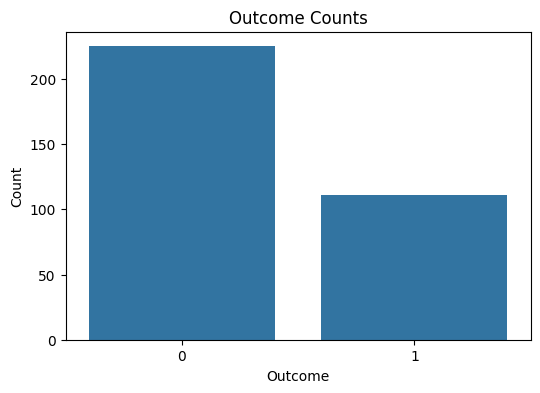

In [14]:
# prompt: generate me the code  to count outcome

# Count the occurrences of each outcome in the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()

# Print the counts
print(outcome_counts)

# You can also visualize the counts using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Counts')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

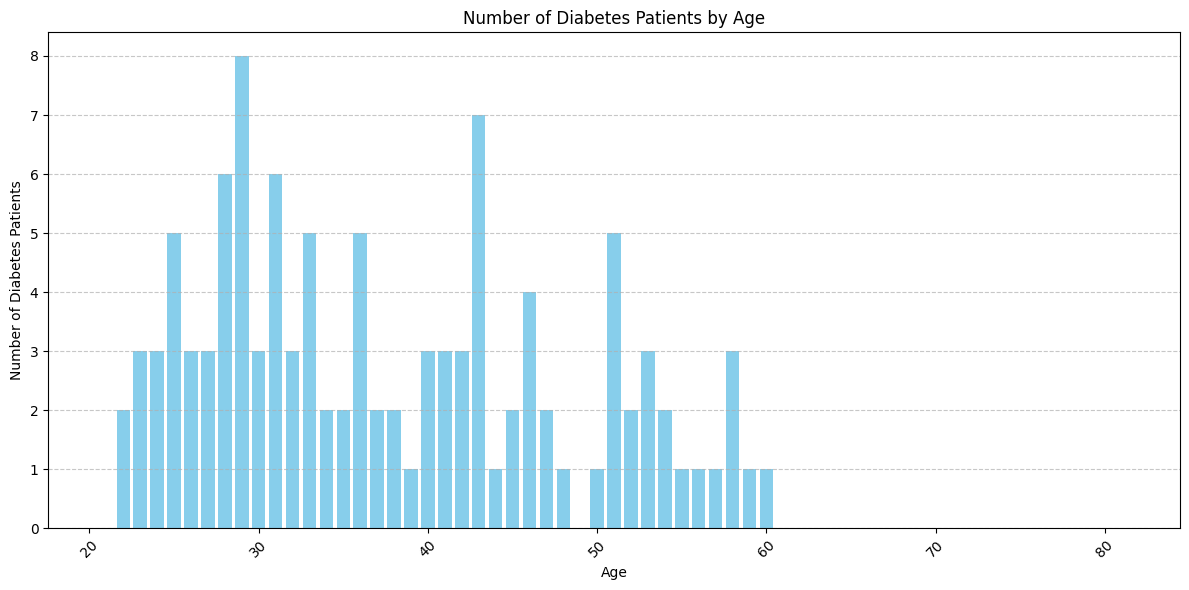

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
age = []
diabetes_patient = []
diabetes_and_age = {'age': age, 'diabetes_patient': diabetes_patient}

for i in df['Age'].unique():
    diabetes_patient.append(df[df['Age'] == i]['Outcome'].sum())
    age.append(i)

# Create a DataFrame
diabetes_and_age = pd.DataFrame(diabetes_and_age)

# Sort values by the number of diabetes patients
diabetes_and_age.sort_values(by=['diabetes_patient'], inplace=True)

# Visualize the data using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(diabetes_and_age['age'], diabetes_and_age['diabetes_patient'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Diabetes Patients')
plt.title('Number of Diabetes Patients by Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
df['Pregnancies']

,Pregnancies
3,1.0
6,3.0
8,2.0
13,1.0
14,5.0
...,...
751,1.0
755,1.0
760,2.0
763,10.0


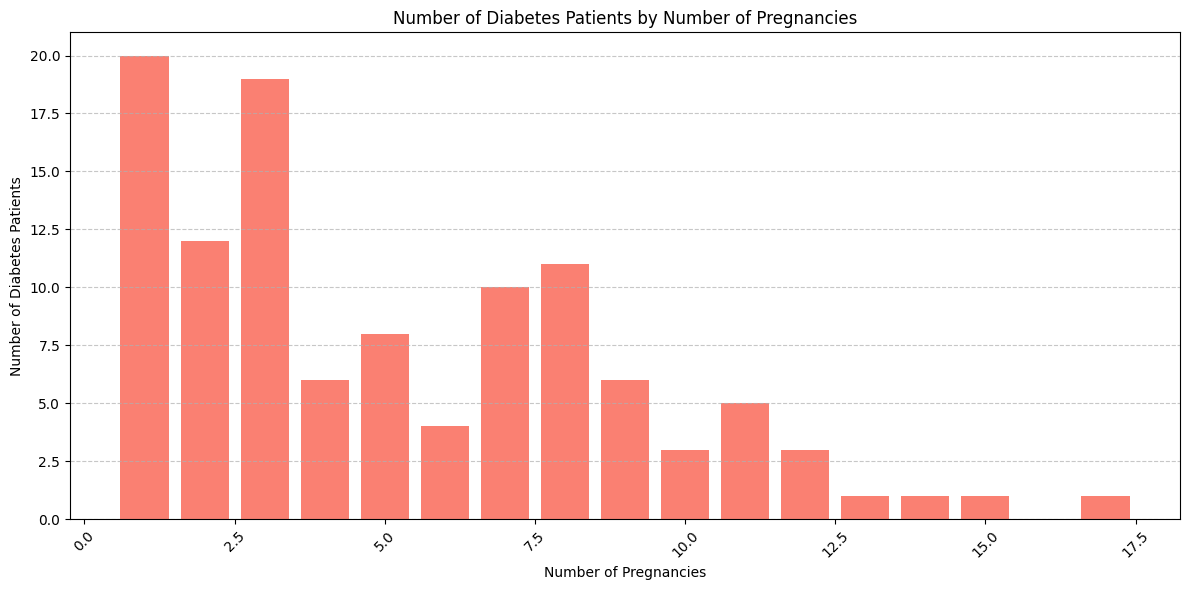

In [17]:
Pregnancies = []
diabetes_patient = []
diabetes_and_pregnancies = {'pregnancies': Pregnancies, 'diabetes_patient': diabetes_patient}

for i in df['Pregnancies'].unique():
    diabetes_patient.append(df[df['Pregnancies'] == i]['Outcome'].sum())
    Pregnancies.append(i)

# Create a DataFrame
diabetes_and_pregnancies = pd.DataFrame(diabetes_and_pregnancies)

# Sort values by the number of diabetes patients
diabetes_and_pregnancies.sort_values(by=['diabetes_patient'], inplace=True)

# Visualize the data using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(diabetes_and_pregnancies['pregnancies'], diabetes_and_pregnancies['diabetes_patient'], color='salmon')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Diabetes Patients')
plt.title('Number of Diabetes Patients by Number of Pregnancies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

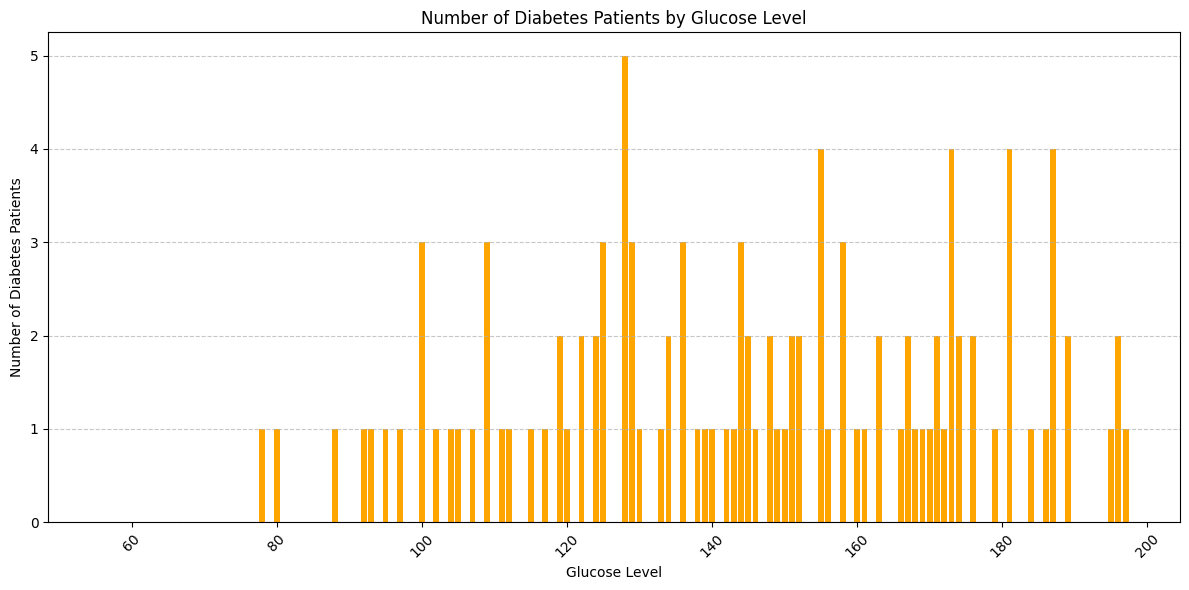

In [22]:
glucose = []
daibetes_patient = []
glucose_and_diabetes = {'Glucose': glucose, 'daibetes_patients': daibetes_patient}

for i in df['Glucose'].unique():
    daibetes_patient.append(df[df['Glucose'] == i]['Outcome'].sum())
    glucose.append(i)

# Create a DataFrame
glucose_and_diabetes = pd.DataFrame(glucose_and_diabetes)

# Sort values by the number of diabetes patients
glucose_and_diabetes.sort_values(by=['daibetes_patients'], inplace=True)

# Visualize the data using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(glucose_and_diabetes['Glucose'], glucose_and_diabetes['daibetes_patients'], color='orange')
plt.xlabel('Glucose Level')
plt.ylabel('Number of Diabetes Patients')
plt.title('Number of Diabetes Patients by Glucose Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

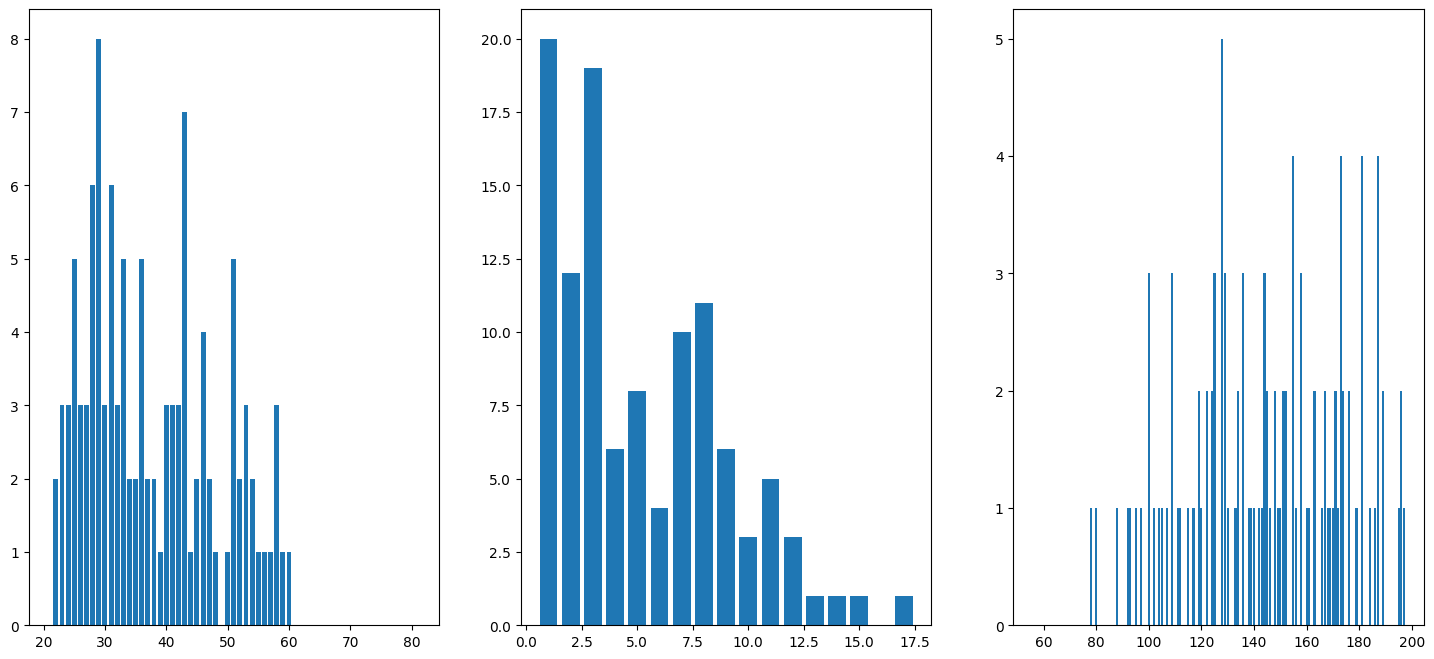

In [23]:
fig,axs=plt.subplots(1,3,figsize=(18,8))
axs[0].bar(diabetes_and_age['age'],diabetes_and_age['diabetes_patient'])
axs[1].bar(diabetes_and_pregnancies['pregnancies'],diabetes_and_pregnancies['diabetes_patient'])
axs[2].bar(glucose_and_diabetes['Glucose'],glucose_and_diabetes['daibetes_patients'])
plt.show()

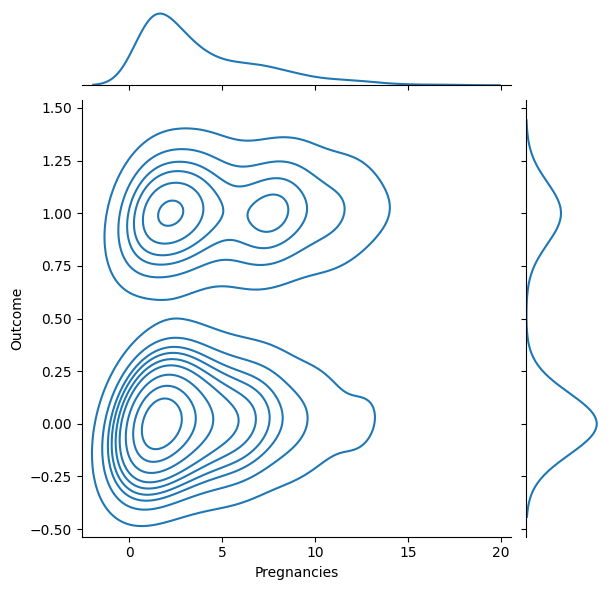

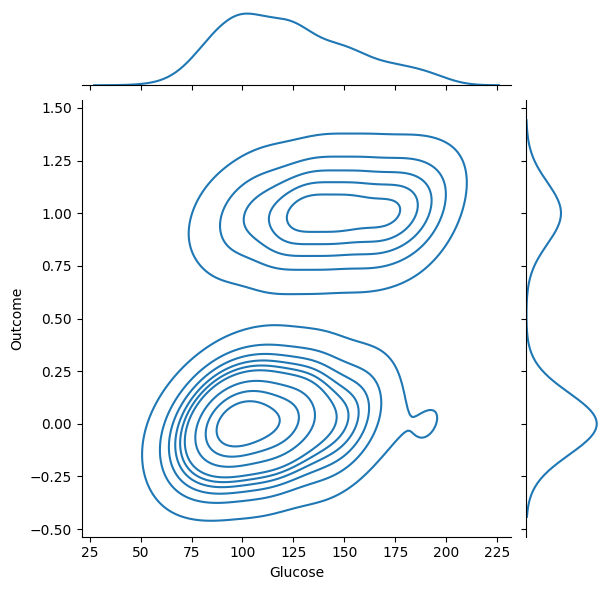

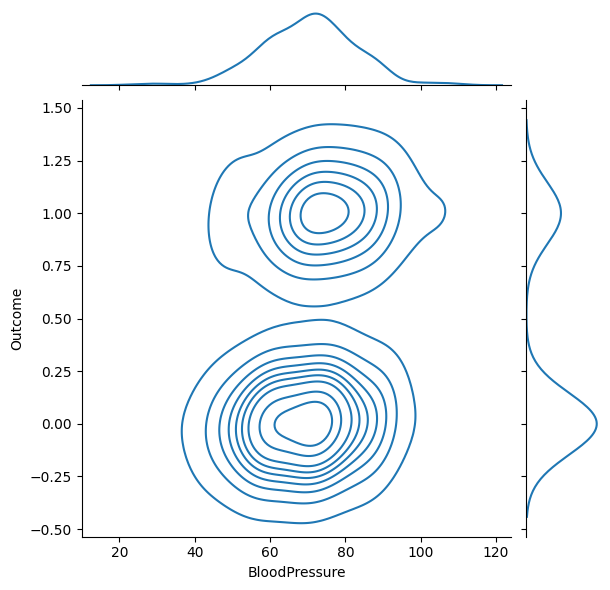

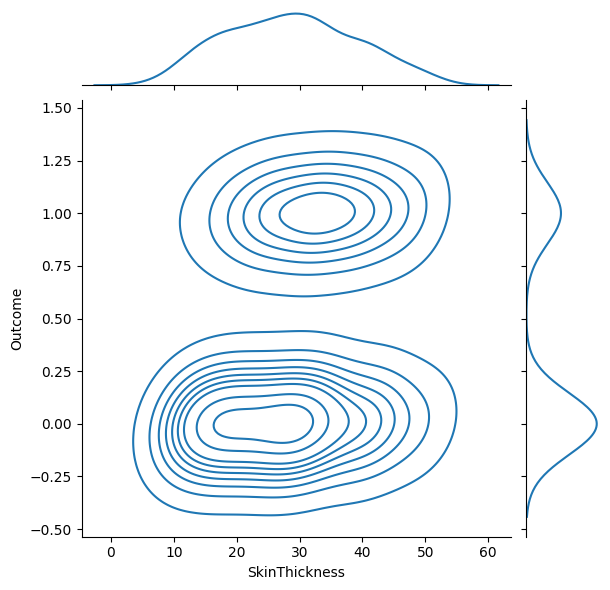

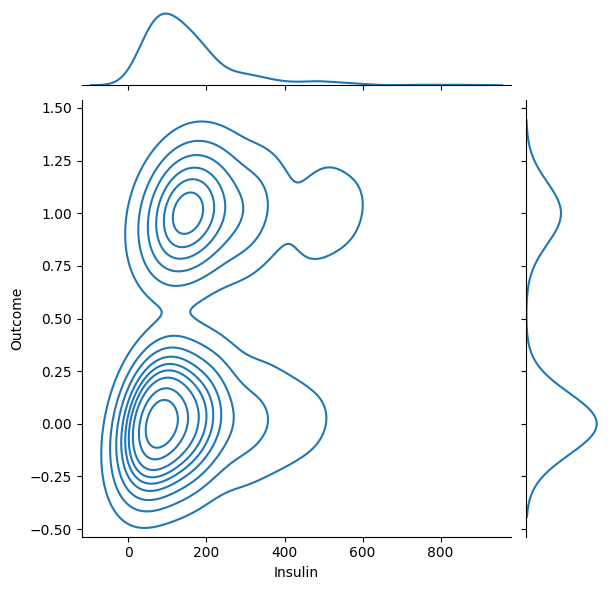

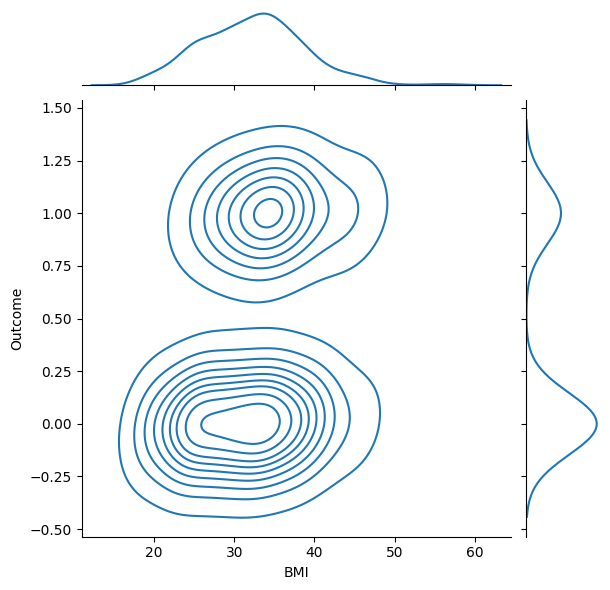

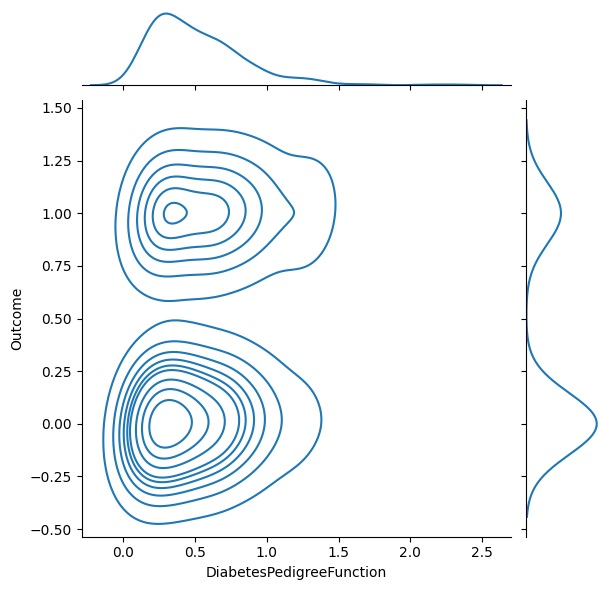

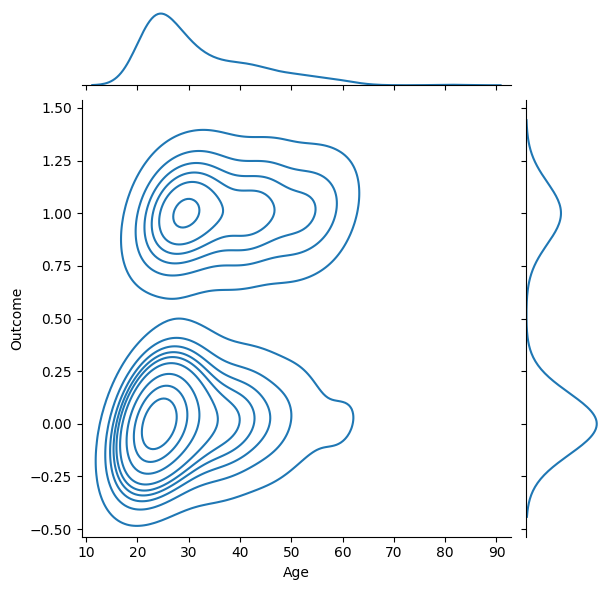

In [25]:
# prompt: generate joint plot for all

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded and preprocessed

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  sns.jointplot(x=col, y='Outcome', data=df, kind='kde')
  plt.show()

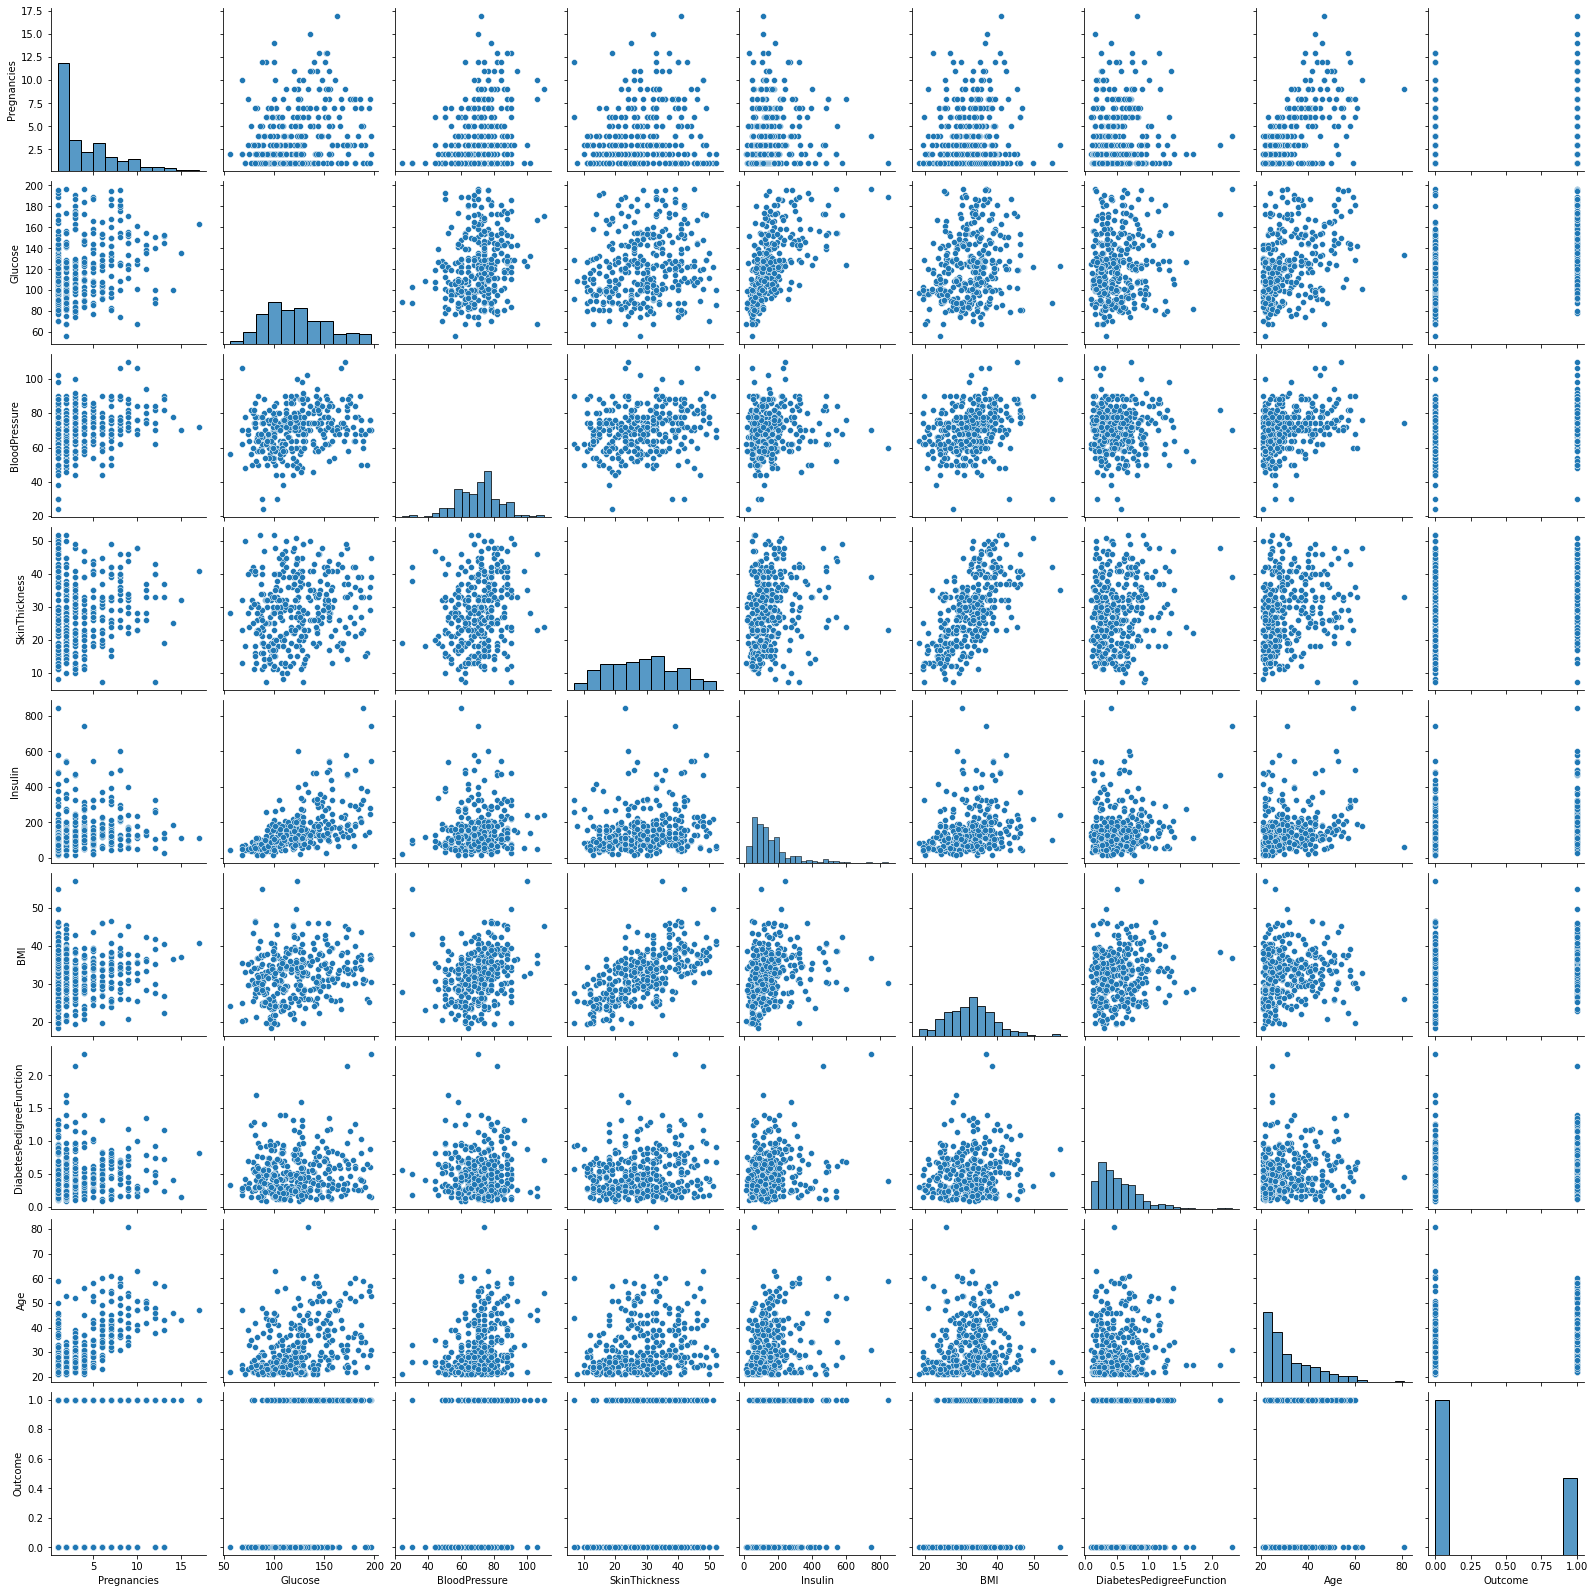

In [ ]:
sns.pairplot(df)
plt.show()

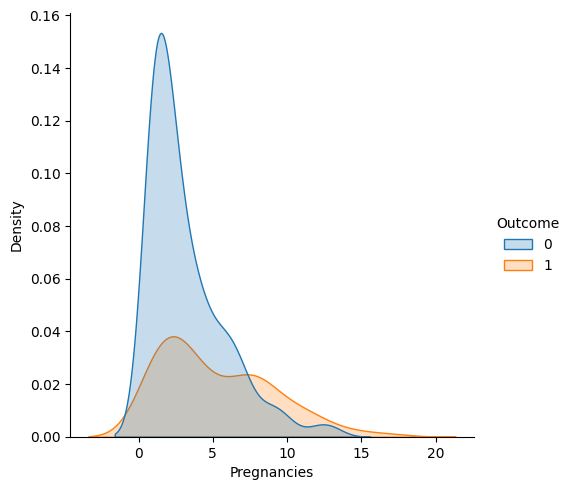

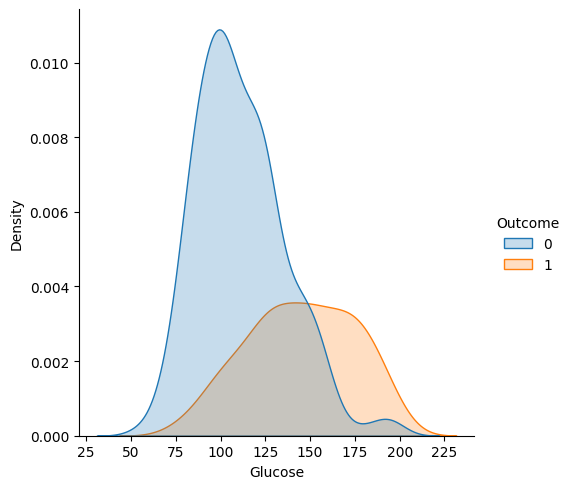

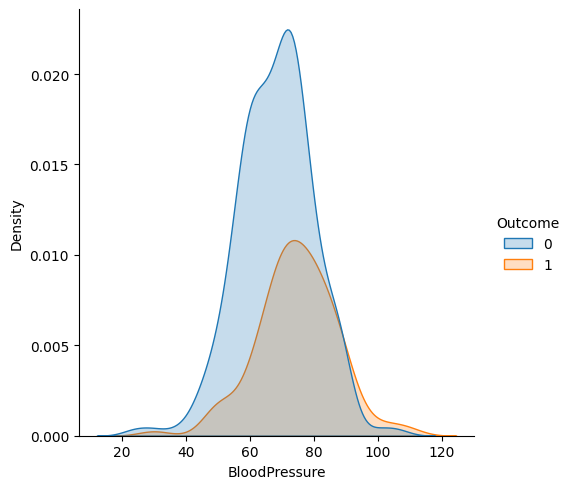

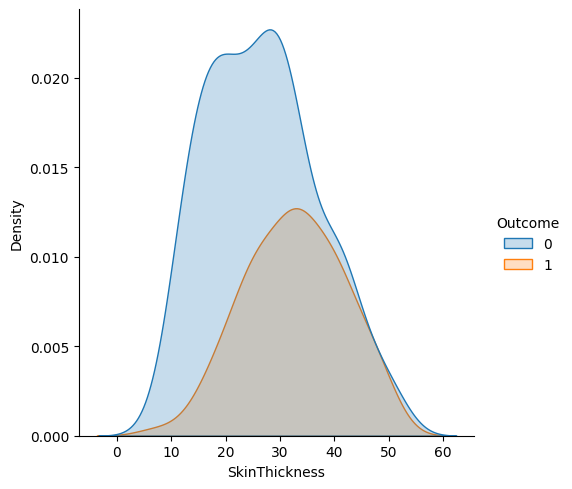

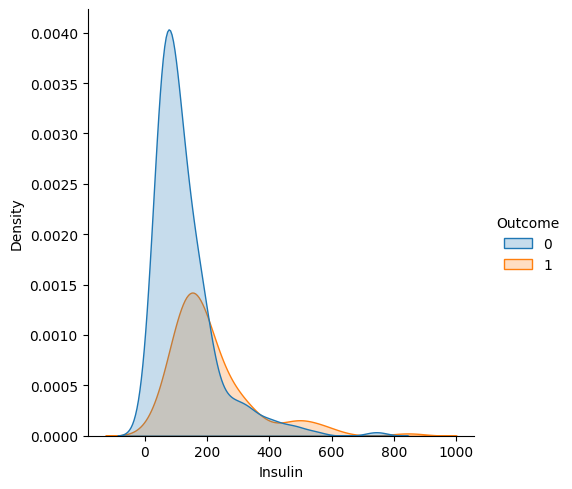

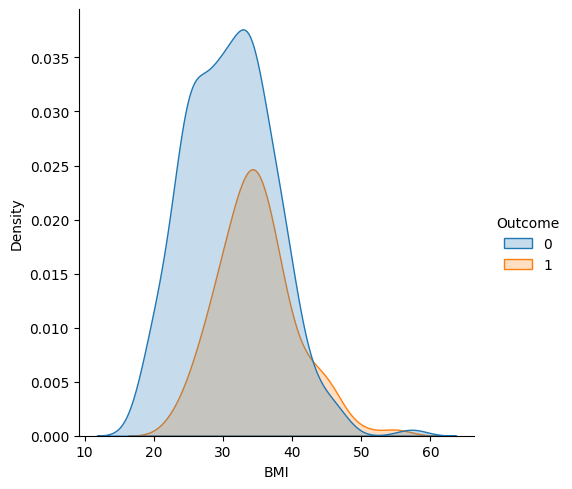

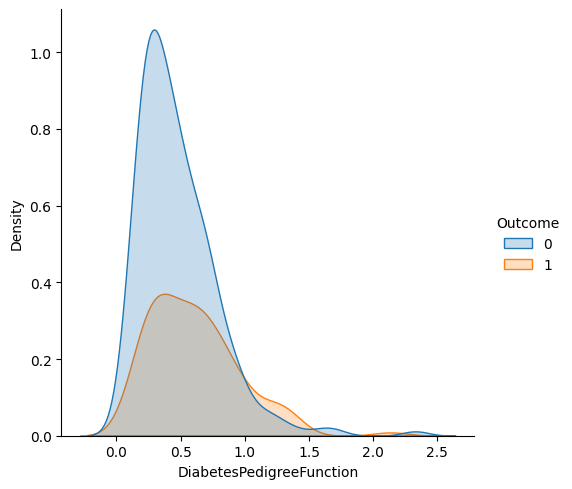

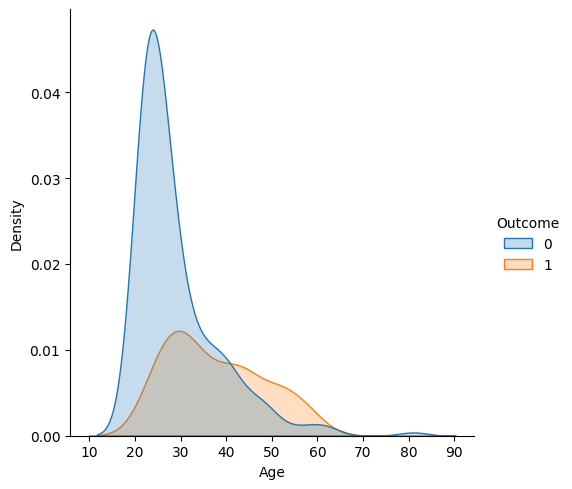

In [27]:
# prompt: distplot

# Assuming 'df' is your DataFrame and it's already loaded and preprocessed

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  sns.displot(df, x=col, hue="Outcome", kind="kde", fill=True) # Use displot for better visualization
  plt.show()

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.250519,0.298336,0.171517,0.101397,0.118681,0.025755,0.675202,0.309008
Glucose,0.250519,1.000000,0.237707,0.204054,0.587348,0.199681,0.117859,0.375484,0.515654
BloodPressure,0.298336,0.237707,1.000000,0.208907,0.100835,0.266723,0.016021,0.343854,0.241377
SkinThickness,0.171517,0.204054,0.208907,1.000000,0.202180,0.639901,0.132766,0.205159,0.266678
Insulin,0.101397,0.587348,0.100835,0.202180,1.000000,0.246661,0.179846,0.242045,0.333050
BMI,0.118681,0.199681,0.266723,0.639901,0.246661,1.000000,0.126696,0.128185,0.278716
DiabetesPedigreeFunction,0.025755,0.117859,0.016021,0.132766,0.179846,0.126696,1.000000,0.074231,0.188130
Age,0.675202,0.375484,0.343854,0.205159,0.242045,0.128185,0.074231,1.000000,0.391538
Outcome,0.309008,0.515654,0.241377,0.266678,0.333050,0.278716,0.188130,0.391538,1.000000


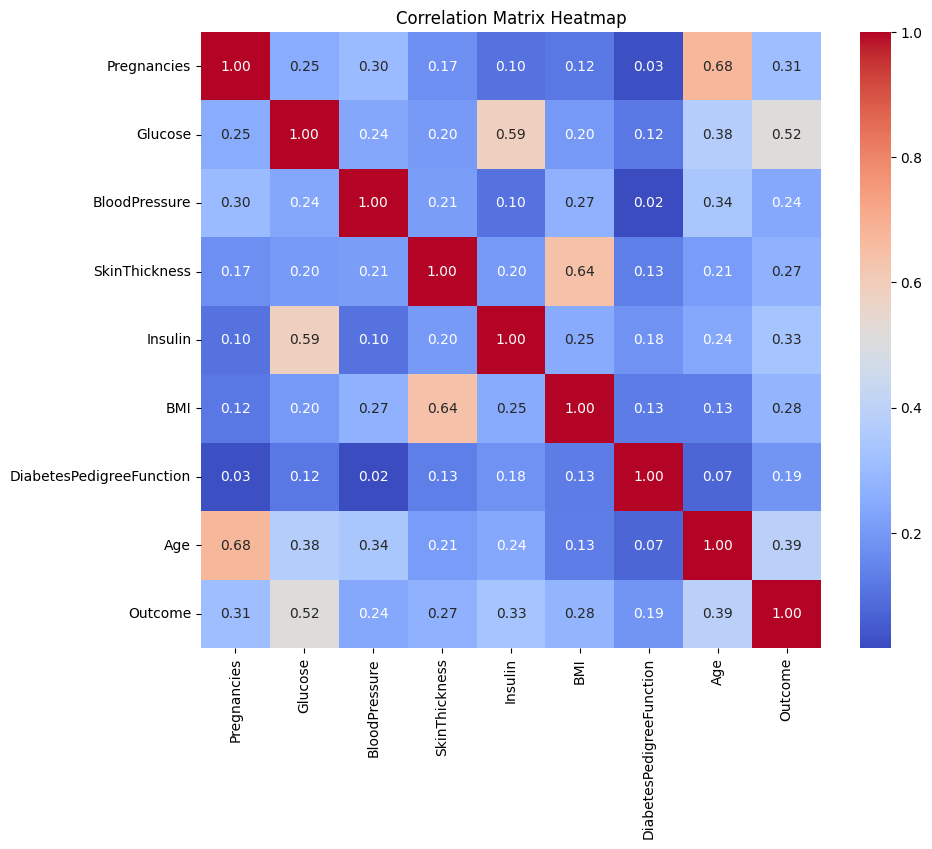

In [30]:
# prompt: pivot table with heat map
# Alternatively, you can exclude columns with incompatible data types from the correlation calculation:
numerical_cols = df.select_dtypes(include=np.number).columns  # Select only numerical columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
df.drop(columns=['AgeGroup'],inplace=True)

In [43]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(235, 8)
(235,)
(101, 8)
(101,)


In [45]:
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,117.0,88.0,24.0,145.0,34.5,0.403,40
1,3.0,120.0,70.0,30.0,135.0,42.9,0.452,30
2,7.0,97.0,76.0,32.0,91.0,40.9,0.871,32
3,2.0,112.0,86.0,42.0,160.0,38.4,0.246,28
4,5.0,86.0,68.0,28.0,71.0,30.2,0.364,24
...,...,...,...,...,...,...,...,...
96,1.0,122.0,64.0,32.0,156.0,35.1,0.692,30
97,4.0,197.0,70.0,39.0,744.0,36.7,2.329,31
98,4.0,148.0,60.0,27.0,318.0,30.9,0.150,29
99,4.0,116.0,72.0,12.0,87.0,22.1,0.463,37


In [46]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
669,9.0,154.0,78.0,30.0,100.0,30.9,0.164,45
110,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24
458,10.0,148.0,84.0,48.0,237.0,37.6,1.001,51
486,1.0,139.0,62.0,41.0,480.0,40.7,0.536,21
520,2.0,68.0,70.0,32.0,66.0,25.0,0.187,25
...,...,...,...,...,...,...,...,...
738,2.0,99.0,60.0,17.0,160.0,36.6,0.453,21
431,3.0,89.0,74.0,16.0,85.0,30.4,0.551,38
282,7.0,133.0,88.0,15.0,155.0,32.4,0.262,37
112,1.0,89.0,76.0,34.0,37.0,31.2,0.192,23


In [47]:
y_train

,Outcome
669,0
110,1
458,1
486,0
520,0
...,...
738,0
431,0
282,0
112,0


In [48]:
# prompt: StandardScaler()

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [51]:
X_test_scaled

array([[-9.08660697e-01, -1.21896637e-01,  1.51596959e+00,
        -4.69202325e-01, -4.44694050e-02,  3.67617861e-01,
        -3.16955781e-01,  7.68657072e-01],
       [-2.85200073e-01, -2.54464361e-02,  4.01234760e-02,
         1.19387780e-01, -1.29778060e-01,  1.66023927e+00,
        -1.53707321e-01, -1.65819968e-01],
       [ 9.61721175e-01, -7.64897979e-01,  5.32072182e-01,
         3.15584482e-01, -5.05136139e-01,  1.35247227e+00,
         1.24223359e+00,  2.10754396e-02],
       [-5.96930385e-01, -2.82646973e-01,  1.35198669e+00,
         1.29656799e+00,  8.34935767e-02,  9.67763515e-01,
        -8.40017173e-01, -3.52715376e-01],
       [ 3.38260551e-01, -1.11854872e+00, -1.23859426e-01,
        -7.68089216e-02, -6.75753448e-01, -2.94081193e-01,
        -4.46888229e-01, -7.26506192e-01],
       [-9.08660697e-01, -1.05424858e+00,  6.96055084e-01,
         2.12894293e-02, -6.33099121e-01, -1.70908909e-02,
        -4.43556627e-01, -2.59267672e-01],
       [ 2.65302393e-02, -3.147970

In [ ]:
X_train

array([[ 1.5851818 ,  1.06765585,  0.69605508, ..., -0.18636274,
        -1.11320847,  1.23589559],
       [-0.28520007,  1.61420699,  0.20410638, ...,  0.18295766,
        -0.99660243, -0.72650619],
       [ 1.89691211,  0.87475544,  1.18800379, ...,  0.84465671,
         1.67534175,  1.79658182],
       ...,
       [ 0.96172118,  0.39250444,  1.51596959, ...,  0.04446251,
        -0.78671155,  0.48831396],
       [-0.9086607 , -1.02209852,  0.53207218, ..., -0.14019769,
        -1.01992364, -0.8199539 ],
       [-0.28520007, -0.66844778, -0.12385943, ..., -0.07864429,
         1.50209849, -0.35271538]])

In [52]:
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()

In [53]:
LinReg=LinReg.fit(X_train,y_train)

In [54]:
LinReg.coef_

array([2.77389963e-02, 5.94368027e-03, 9.96476962e-04, 3.82886365e-03,
       3.91989462e-04, 6.38130147e-03, 2.38441790e-01, 1.61185785e-04])

In [55]:
LinReg.intercept_

-1.0958309948176723

In [56]:
y_pred1=LinReg.predict(X_test)

In [57]:
y_pred1

array([ 0.18643414,  0.3245346 ,  0.38264187,  0.24277865,  0.04019693,
       -0.0305874 ,  0.58492503,  0.32305462,  0.42306425,  0.6013275 ,
        0.08383255,  0.85942788,  0.00642045, -0.07340993, -0.13159589,
        0.37540676,  0.34401824,  0.19620623,  0.44758487,  0.47456841,
        0.08414616,  0.35512905,  0.22054664, -0.00573718,  0.38100413,
        0.32779452,  0.63049842,  0.494575  ,  0.17903944,  0.62125051,
        0.1038842 ,  0.66244355,  0.70052698,  0.40610243,  0.33683729,
        0.51305862,  0.06438993,  0.46374792,  0.18281043,  0.46680878,
        0.44749644,  0.25502585,  0.51351466,  0.90907796,  0.47346861,
        0.12199605, -0.13153234,  0.31727011,  0.84538078,  0.44891775,
        0.79055637,  0.52024825, -0.03869038,  0.36279753,  0.11108401,
        0.7226443 , -0.04255754,  0.4960808 ,  0.1897682 , -0.10683899,
        0.6666068 ,  0.74993634,  0.33471834,  0.84385339, -0.11707815,
        0.09675009,  0.64517253, -0.10430472,  0.93610361,  0.05

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [59]:
r2_score(y_test,y_pred1)

0.13137769327298054

In [60]:
mean_absolute_error(y_test,y_pred1)

0.3646642893471205

In [61]:
mean_squared_error(y_test,y_pred1)

0.20947072586496102

In [62]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=lg.predict(X_test)

In [64]:
y_pred.shape

(101,)

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [66]:
confusion_matrix(y_test,y_pred)

array([[52,  8],
       [24, 17]])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6831683168316832

In [68]:
recall_score(y_test,y_pred)

0.4146341463414634

In [69]:
precision_score(y_test,y_pred)

0.68

In [70]:
from sklearn.tree import DecisionTreeRegressor
DTS= DecisionTreeRegressor()
DTS.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
predict_3=DTS.predict(X_test)

In [72]:
accuracy_score(y_test,predict_3)

0.6435643564356436

In [73]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators = 50, max_depth=2, random_state=0)

In [74]:
Rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

In [75]:
y_pred3=Rf.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred3)

array([[57,  3],
       [24, 17]])

In [77]:
accuracy_score(y_test,y_pred3)

0.7326732673267327

In [78]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred3)

0.5573770491803278

In [79]:
precision_score(y_test,y_pred3)

0.85

In [80]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [81]:
NB.fit(X_train,y_train)

GaussianNB()

In [82]:
y_pred4=NB.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76        60
           1       0.68      0.41      0.52        41

    accuracy                           0.68       101
   macro avg       0.68      0.64      0.64       101
weighted avg       0.68      0.68      0.66       101



In [84]:
accuracy_score(y_test,y_pred4)

0.7029702970297029

In [85]:
precision_score(y_test,y_pred4)

0.6486486486486487

In [86]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [87]:
y_pred5=svm.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred5)

0.6732673267326733

In [89]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [90]:
y_pred6=KNN.predict(X_test)

In [91]:
confusion_matrix(y_test,y_pred6)

array([[50, 10],
       [23, 18]])

In [92]:
accuracy_score(y_test,y_pred6)

0.6732673267326733

In [93]:
precision_score(y_test,y_pred6)

0.6428571428571429

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


In [95]:
KNN = KNeighborsClassifier()
k = range(1, 39, 2)
mat = ["eclediean", "manhattan", "minkowski"]
w = ["uniform", "distance"]

search_space = dict(n_neighbors = k, metric = mat, weights = w)

In [96]:
X_train1 = X_train[:1000]
y_train1 = y_train[:1000]

In [97]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
search = GridSearchCV(estimator=KNN, param_grid= search_space,cv = cv,  scoring = "accuracy")
search_result = search.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1140 fits failed out of a total of 3420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [98]:
search_result.best_score_

0.8339371980676329

In [99]:
search_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [100]:
knn = KNeighborsClassifier(metric ='manhattan', n_neighbors = 7, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [101]:
y_pred8 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred8))

0.7128712871287128



This project focuses on predicting diabetes using a dataset and various machine learning models. Here's a breakdown:

**1. Data Loading and Preprocessing:**

*   The project begins by importing necessary libraries (NumPy, Pandas, Matplotlib, Seaborn, scikit-learn) and mounting Google Drive to access the diabetes dataset.
*   The dataset `diabetes.csv` is loaded into a Pandas DataFrame.
*   Missing values (represented by 0s in several columns like 'Pregnancies', 'Glucose', 'BloodPressure', etc.) are replaced with NaN (Not a Number).
*   Rows with missing values are then dropped.
*   Duplicate rows are checked, and descriptive statistics of the dataset are displayed.
*   The distribution of the target variable 'Outcome' (0 for no diabetes, 1 for diabetes) is analyzed using value counts and a countplot.


**2. Exploratory Data Analysis (EDA):**

*   The relationship between 'Age', 'Pregnancies', and 'Glucose' with the 'Outcome' is visualized using bar plots.  These plots show how the number of diabetes patients varies with different age groups, pregnancy counts, and glucose levels.
*   Joint plots and pair plots are used to explore the relationships between all numerical features and the 'Outcome' variable. This is done to visually identify potential correlations.
*   Kernel Density Estimation (KDE) plots are generated for each feature, colored by 'Outcome', to understand the distribution of the features for diabetic and non-diabetic patients.
*   A correlation matrix heatmap is generated to visualize the pairwise correlations between numerical features.

**3. Feature Engineering (Minor):**

* A column named 'AgeGroup' seems to be dropped, suggesting it might have been created earlier but was deemed unnecessary for the final model.

**4. Model Training and Evaluation:**

The data is split into training and testing sets (70% training, 30% testing). StandardScaler is used to standardize the features.

*   **Linear Regression:** A linear regression model is trained, but given the nature of the outcome (binary classification), this model is inappropriate and provides a baseline.  Metrics like R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE) are computed but are less meaningful for this type of problem.
*   **Logistic Regression:**  A logistic regression model is trained and evaluated using a confusion matrix, accuracy, recall, precision, and the F1-score. This is more appropriate for a binary classification problem.
*   **Decision Tree Regressor:** A decision tree regressor is used (also not ideal for classification). Accuracy is calculated, but it is not the best metric for a regression model applied to a classification task.
*   **Random Forest Classifier:** A random forest classifier is trained and evaluated using confusion matrix, accuracy, F1-score, and precision.
*   **Gaussian Naive Bayes:** A Gaussian Naive Bayes classifier is trained and evaluated with classification report and accuracy.
*   **Support Vector Machine (SVM):** An SVM classifier is used and its accuracy is evaluated.
*   **K-Nearest Neighbors (KNN):** A KNN classifier is initially trained and evaluated using a confusion matrix, accuracy and precision. Hyperparameter tuning is then performed using GridSearchCV on a subset of the training data (first 1000 samples) to find optimal hyperparameters for `n_neighbors`, `metric`, and `weights`. Finally, the best KNN model is retrained and tested, and its accuracy is reported.

**5. Summary of Results:**

The project explores several classification algorithms.  The performance of the models based on accuracy is reported.  The best-performing model likely is the tuned KNN classifier, but the exact numbers are not explicitly presented in the final report and would need to be re-executed to obtain them.

**Improvements and Recommendations:**

*   **Focus on Classification Metrics:**  Given the binary classification nature of the problem, concentrate more on precision, recall, F1-score, and AUC-ROC curves to properly evaluate model performance.  The use of regression models (Linear Regression, Decision Tree Regressor) is inappropriate for this task and should be removed.
*   **More Comprehensive Hyperparameter Tuning:** Hyperparameter tuning was only performed for KNN with a subset of data. This should be done for other models (Random Forest, SVM) as well for more robust results.  The `RepeatedStratifiedKFold` cross-validation strategy is a good starting point and should be consistently used.
*   **Cross-Validation:** Use cross-validation (e.g., k-fold) on the *entire* dataset for a more accurate assessment of model performance.
*   **Feature Scaling:** Consistent application of feature scaling (like StandardScaler) across all models is necessary to prevent features with larger values from disproportionately influencing the models.
*   **More Visualizations:** Consider visualizations of the model performance (ROC curves, precision-recall curves) and feature importances for a more complete analysis.
* **Consider other models**: explore other relevant classification models.
*   **Documentation:** Add more detailed comments to explain the purpose of each step and the rationale behind using certain algorithms or parameters.


This improved report gives a more complete overview of the project, its methodology, findings and suggested areas for enhancements.
